In [64]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [33]:
df = pd.read_csv('datasets-1/bitcointweets.csv')

In [3]:
df

,Fri Mar 23 00:40:32 +0000 2018,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I had to tweak the nose of this Bitcoin enemy. He says such foolish things. Here's the link: htt…",myresumerocket,16522,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",['neutral']
0,Fri Mar 23 00:40:34 +0000 2018,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,BitMocro,1295,0,[u'Bitcoin'],"<a href=""http://twitter.com/download/android"" ...",['neutral']
1,Fri Mar 23 00:40:35 +0000 2018,RT @tippereconomy: Another use case for #block...,hojachotopur,6090,0,"[u'blockchain', u'Tipper', u'TipperEconomy']","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
2,Fri Mar 23 00:40:36 +0000 2018,free coins https://t.co/DiuoePJdap,denies_distro,2626,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
3,Fri Mar 23 00:40:36 +0000 2018,RT @payvxofficial: WE are happy to announce th...,aditzgraha,184,0,[],"<a href=""http://twitter.com/download/android"" ...",['positive']
4,Fri Mar 23 00:40:36 +0000 2018,Copy successful traders automatically with Bit...,VictorS61164810,14,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
...,...,...,...,...,...,...,...,...
50853,Fri Mar 23 08:55:16 +0000 2018,RT @fixy_app: Fixy Network brings popular cryp...,quoting_lives,5673,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
50854,Fri Mar 23 08:55:17 +0000 2018,RT @bethereumteam: After a successful launch o...,VariPewitt,372,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
50855,Fri Mar 23 08:55:18 +0000 2018,"RT @GymRewards: Buy #GYMRewards Tokens, Bonus ...",urbancoinerz,557,0,"[u'GYMRewards', u'ICO', u'cryptocurrency', u'm...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['neutral']
50856,Fri Mar 23 08:55:19 +0000 2018,I added a video to a @YouTube playlist https:/...,MRDanishShahab,3,0,[],"<a href=""http://www.google.com/"" rel=""nofollow...",['positive']


In [34]:
# od twitovite odreduvame dali ni e pozitivno, negativno ili neutralno i spored vestite i tvitovite ke vidime dali BTC ke raste ili ne 

#pravam koloni

df.columns = ['date', 'text', 'user', 'id', 'unknown', 'hashtags', 'url', 'sentiment_values']

In [35]:
df.drop(columns=['id', 'unknown'], inplace=True)

In [16]:
df

,date,text,user,hashtags,url,sentiment_values
0,Fri Mar 23 00:40:34 +0000 2018,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,BitMocro,[u'Bitcoin'],"<a href=""http://twitter.com/download/android"" ...",['neutral']
1,Fri Mar 23 00:40:35 +0000 2018,RT @tippereconomy: Another use case for #block...,hojachotopur,"[u'blockchain', u'Tipper', u'TipperEconomy']","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
2,Fri Mar 23 00:40:36 +0000 2018,free coins https://t.co/DiuoePJdap,denies_distro,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
3,Fri Mar 23 00:40:36 +0000 2018,RT @payvxofficial: WE are happy to announce th...,aditzgraha,[],"<a href=""http://twitter.com/download/android"" ...",['positive']
4,Fri Mar 23 00:40:36 +0000 2018,Copy successful traders automatically with Bit...,VictorS61164810,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
...,...,...,...,...,...,...
50853,Fri Mar 23 08:55:16 +0000 2018,RT @fixy_app: Fixy Network brings popular cryp...,quoting_lives,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
50854,Fri Mar 23 08:55:17 +0000 2018,RT @bethereumteam: After a successful launch o...,VariPewitt,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
50855,Fri Mar 23 08:55:18 +0000 2018,"RT @GymRewards: Buy #GYMRewards Tokens, Bonus ...",urbancoinerz,"[u'GYMRewards', u'ICO', u'cryptocurrency', u'm...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['neutral']
50856,Fri Mar 23 08:55:19 +0000 2018,I added a video to a @YouTube playlist https:/...,MRDanishShahab,[],"<a href=""http://www.google.com/"" rel=""nofollow...",['positive']


In [36]:
df.sentiment_values.value_counts()

sentiment_values
['positive']    22937
['neutral']     21938
['negative']     5983
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='sentiment_values'>

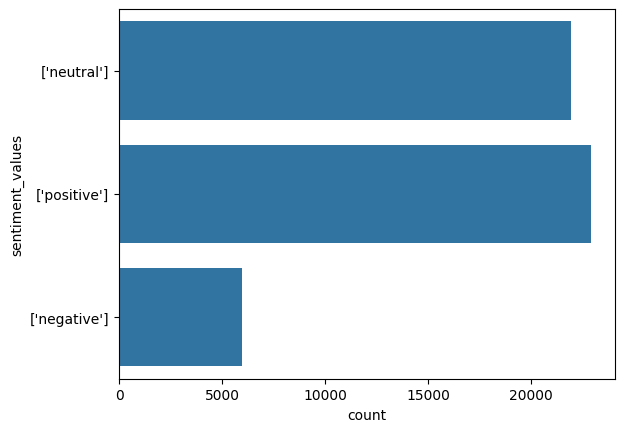

In [27]:
sns.countplot(df.sentiment_values) # ne ni e balansiran 

In [37]:
# kolku ni se dolgi tekstovite 

df['text_length'] = df['text'].apply(len) #dodava length 

In [29]:
df

,date,text,user,hashtags,url,sentiment_values,text_length
0,Fri Mar 23 00:40:34 +0000 2018,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,BitMocro,[u'Bitcoin'],"<a href=""http://twitter.com/download/android"" ...",['neutral'],137
1,Fri Mar 23 00:40:35 +0000 2018,RT @tippereconomy: Another use case for #block...,hojachotopur,"[u'blockchain', u'Tipper', u'TipperEconomy']","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive'],140
2,Fri Mar 23 00:40:36 +0000 2018,free coins https://t.co/DiuoePJdap,denies_distro,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive'],34
3,Fri Mar 23 00:40:36 +0000 2018,RT @payvxofficial: WE are happy to announce th...,aditzgraha,[],"<a href=""http://twitter.com/download/android"" ...",['positive'],146
4,Fri Mar 23 00:40:36 +0000 2018,Copy successful traders automatically with Bit...,VictorS61164810,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive'],138
...,...,...,...,...,...,...,...
50853,Fri Mar 23 08:55:16 +0000 2018,RT @fixy_app: Fixy Network brings popular cryp...,quoting_lives,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive'],140
50854,Fri Mar 23 08:55:17 +0000 2018,RT @bethereumteam: After a successful launch o...,VariPewitt,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive'],140
50855,Fri Mar 23 08:55:18 +0000 2018,"RT @GymRewards: Buy #GYMRewards Tokens, Bonus ...",urbancoinerz,"[u'GYMRewards', u'ICO', u'cryptocurrency', u'm...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['neutral'],140
50856,Fri Mar 23 08:55:19 +0000 2018,I added a video to a @YouTube playlist https:/...,MRDanishShahab,[],"<a href=""http://www.google.com/"" rel=""nofollow...",['positive'],121


In [32]:
df

,date,text,user,hashtags,url,text_length,sentiment_values_['negative'],sentiment_values_['neutral'],sentiment_values_['positive']
0,Fri Mar 23 00:40:34 +0000 2018,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,BitMocro,[u'Bitcoin'],"<a href=""http://twitter.com/download/android"" ...",137,False,True,False
1,Fri Mar 23 00:40:35 +0000 2018,RT @tippereconomy: Another use case for #block...,hojachotopur,"[u'blockchain', u'Tipper', u'TipperEconomy']","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",140,False,False,True
2,Fri Mar 23 00:40:36 +0000 2018,free coins https://t.co/DiuoePJdap,denies_distro,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",34,False,False,True
3,Fri Mar 23 00:40:36 +0000 2018,RT @payvxofficial: WE are happy to announce th...,aditzgraha,[],"<a href=""http://twitter.com/download/android"" ...",146,False,False,True
4,Fri Mar 23 00:40:36 +0000 2018,Copy successful traders automatically with Bit...,VictorS61164810,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",138,False,False,True
...,...,...,...,...,...,...,...,...,...
50853,Fri Mar 23 08:55:16 +0000 2018,RT @fixy_app: Fixy Network brings popular cryp...,quoting_lives,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",140,False,False,True
50854,Fri Mar 23 08:55:17 +0000 2018,RT @bethereumteam: After a successful launch o...,VariPewitt,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",140,False,False,True
50855,Fri Mar 23 08:55:18 +0000 2018,"RT @GymRewards: Buy #GYMRewards Tokens, Bonus ...",urbancoinerz,"[u'GYMRewards', u'ICO', u'cryptocurrency', u'm...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",140,False,True,False
50856,Fri Mar 23 08:55:19 +0000 2018,I added a video to a @YouTube playlist https:/...,MRDanishShahab,[],"<a href=""http://www.google.com/"" rel=""nofollow...",121,False,False,True


In [43]:
x = df['text']
y = pd.get_dummies(df['sentiment_values']) #samo za y gi pravam so one hot 

In [44]:
y

,['negative'],['neutral'],['positive']
0,False,True,False
1,False,False,True
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
50853,False,False,True
50854,False,False,True
50855,False,True,False
50856,False,False,True


In [45]:
x

0        @lopp @_Kevin_Pham @psycho_sage @naval But @Pr...
1        RT @tippereconomy: Another use case for #block...
2                       free coins https://t.co/DiuoePJdap
3        RT @payvxofficial: WE are happy to announce th...
4        Copy successful traders automatically with Bit...
                               ...                        
50853    RT @fixy_app: Fixy Network brings popular cryp...
50854    RT @bethereumteam: After a successful launch o...
50855    RT @GymRewards: Buy #GYMRewards Tokens, Bonus ...
50856    I added a video to a @YouTube playlist https:/...
50857    RT @Raybambs: Airdrop PhotoCoin Airdrop Round#...
Name: text, Length: 50858, dtype: object

In [48]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [57]:
# sakame od ovoj tekst da dobieme vektor od brojki - embeddings 

from tensorflow.keras.preprocessing.text import Tokenizer #davame tekst i ni dava sekvenca od brojki 

tokenizer = Tokenizer(num_words=10000) #max zborovi

tokenizer.fit_on_texts(x_train ) #go ucime tokenizatorot na novi zborovi

x_train = tokenizer.texts_to_sequences(x_train)

In [70]:
x_train

[[1909, 7, 4, 120, 1, 2, 3, 100, 1288],
 [8705, 5972, 1813, 566, 1759, 8, 177, 1442, 154, 791, 1, 2, 3],
 [5,
  1410,
  15,
  50,
  115,
  44,
  20,
  520,
  1260,
  189,
  54,
  2599,
  7,
  28,
  882,
  2394,
  1,
  2,
  3,
  2600,
  9,
  1993,
  2526],
 [1848, 2223, 5059, 328, 1693, 98, 1848, 1, 2, 3, 104, 4, 1, 2, 3],
 [5, 4749, 4478, 2171, 29, 2466, 3803, 21, 4, 3348, 1, 2, 3, 4479],
 [5,
  26,
  52,
  539,
  20,
  258,
  400,
  29,
  15,
  135,
  7,
  153,
  21,
  68,
  538,
  258,
  490,
  17,
  4,
  459],
 [4212,
  4213,
  2280,
  4,
  233,
  94,
  233,
  45,
  223,
  549,
  40,
  295,
  34,
  200,
  154,
  576,
  1,
  2,
  3],
 [4,
  4,
  2835,
  83,
  2836,
  3804,
  234,
  18,
  199,
  755,
  11,
  6,
  170,
  584,
  239,
  308,
  1784,
  12,
  5973,
  22,
  1,
  2,
  3],
 [5,
  1674,
  4,
  12,
  18,
  254,
  374,
  7,
  35,
  47,
  2172,
  145,
  1305,
  11,
  8,
  1411,
  10,
  239,
  279,
  50,
  186,
  7,
  31,
  513,
  27,
  4,
  17,
  279,
  217],
 [138,
  1585,
  114

In [59]:
x_test = tokenizer.texts_to_sequences(x_test)

In [62]:
#mora ista dolzina da imame 

#dolzina na sekoj tekst 
total = [len(text) for text in x_train ]
total #gi zima dolzinite na site zborovi 

[9,
 13,
 23,
 15,
 14,
 20,
 19,
 23,
 29,
 22,
 13,
 22,
 18,
 22,
 18,
 18,
 19,
 24,
 20,
 4,
 17,
 24,
 24,
 21,
 6,
 15,
 23,
 24,
 16,
 20,
 22,
 14,
 14,
 24,
 12,
 20,
 26,
 24,
 14,
 23,
 13,
 15,
 20,
 22,
 21,
 25,
 21,
 14,
 16,
 7,
 16,
 22,
 21,
 23,
 20,
 22,
 12,
 28,
 23,
 13,
 16,
 19,
 18,
 16,
 17,
 15,
 23,
 22,
 19,
 7,
 15,
 26,
 11,
 25,
 22,
 16,
 27,
 20,
 17,
 20,
 18,
 8,
 23,
 9,
 29,
 19,
 21,
 20,
 17,
 19,
 22,
 20,
 22,
 20,
 26,
 9,
 22,
 20,
 21,
 19,
 10,
 24,
 22,
 21,
 17,
 24,
 21,
 17,
 14,
 24,
 20,
 19,
 11,
 16,
 5,
 19,
 22,
 13,
 21,
 16,
 20,
 25,
 18,
 19,
 21,
 26,
 26,
 7,
 15,
 23,
 24,
 12,
 20,
 23,
 19,
 24,
 22,
 19,
 7,
 7,
 18,
 26,
 24,
 21,
 26,
 15,
 17,
 12,
 19,
 18,
 22,
 22,
 22,
 15,
 16,
 12,
 17,
 20,
 18,
 7,
 14,
 20,
 18,
 11,
 20,
 25,
 25,
 24,
 13,
 15,
 22,
 22,
 21,
 19,
 25,
 23,
 10,
 21,
 18,
 18,
 11,
 24,
 14,
 23,
 13,
 7,
 18,
 28,
 20,
 17,
 16,
 21,
 23,
 15,
 11,
 18,
 15,
 24,
 24,
 16,
 24,
 25,
 21,

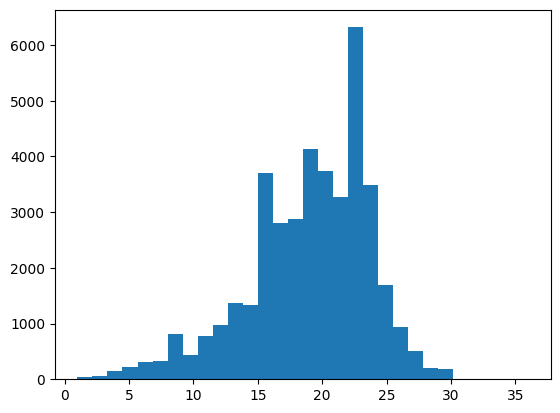

In [67]:
plt.hist(total,bins=30)
plt.show()

In [68]:
max_words = 23

In [77]:
from keras.preprocessing import sequence
from keras.layers import Embedding, Conv1D, MaxPool1D

x_train = sequence.pad_sequences(x_train, maxlen=max_words) #ke napravi padding, potocno ke ja smali dadenata recenica - ke ja skrati listata
x_test = sequence.pad_sequences(x_test, maxlen=max_words)

In [81]:
model = Sequential()

#vlezen sloj
model.add(Embedding(input_dim=10000,output_dim=150))

#hidden layer 
model.add(Conv1D(filters=32, kernel_size=3, padding='same',activation='relu'))
model.add(MaxPool1D(pool_size=2 ))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))

#output layer
model.add(Dense(3,activation='softmax')) #3 nevroni na izlez bidejki y ima 3 izlezi


In [82]:
model.compile(loss='categorical_crossentropy', optimizer='adam') #koga imame poveke katergorii

In [83]:
model.fit(x_train, y_train, batch_size=128, epochs = 10, validation_split=0.2)

Epoch 1/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.5935 - val_loss: 0.1251
Epoch 2/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0879 - val_loss: 0.1028
Epoch 3/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0418 - val_loss: 0.1086
Epoch 4/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0229 - val_loss: 0.1235
Epoch 5/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0201 - val_loss: 0.1287
Epoch 6/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0146 - val_loss: 0.1425
Epoch 7/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0113 - val_loss: 0.1389
Epoch 8/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0129 - val_loss: 0.1509
Epoch 9/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0106 - val_loss: 0.1488
Epoch 10/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0095 - val_loss: 0.1508


In [90]:
y_pred = model.predict(x_test)

318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [91]:
y_pred = y_pred.round()

In [92]:
y_pred

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [96]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix

print(f1_score(y_test, y_pred, average='micro'))
print(classification_report(y_test, y_pred))

0.9696105428796223
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1169
           1       0.98      0.97      0.97      4384
           2       0.97      0.98      0.98      4619

   micro avg       0.97      0.97      0.97     10172
   macro avg       0.97      0.96      0.96     10172
weighted avg       0.97      0.97      0.97     10172
 samples avg       0.97      0.97      0.97     10172



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
